In [57]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
from scipy import interpolate
import os
import matplotlib.pyplot as plt
from cosmojo.universe import Cosmo
from matplotlib.pyplot import cm  
import matplotlib.colors as mcolors

from rotation import *

arcmin2rad = np.pi / 180. / 60. 
rad2arcmin = 1./arcmin2rad

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
cosmo = Cosmo()

In [4]:
cmbspec = cosmo.cmb_spectra(5000)
cmbspec_r = Cosmo({'r':0.1}).cmb_spectra(3000, spec='tensor')

/Users/fbianchini/anaconda2/lib/python2.7/site-packages/CosMojo-0.1.0-py2.7.egg/cosmojo/universe.py:506: RuntimeWarning: divide by zero encountered in divide
  fact = 2.*np.pi/(ls*(ls+1)) * 1.e12 * self.pars.TCMB**2.
/Users/fbianchini/anaconda2/lib/python2.7/site-packages/CosMojo-0.1.0-py2.7.egg/cosmojo/universe.py:514: RuntimeWarning: invalid value encountered in multiply
  cls[:,i] *= fact


In [48]:
lrot, clbrot = GimmeClBBRot(cmbspec, nwanted=200, A_CB=1, )


rotation.py:402: RuntimeWarning: divide by zero encountered in divide
  claa = np.nan_to_num(A_CB*1e-5*2*np.pi/ell/(ell+1))


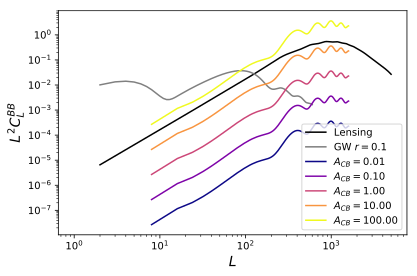

In [22]:
plt.loglog(cmbspec[:,2]*np.arange(cmbspec.shape[0])**2, 'k', label='Lensing')
plt.loglog(cmbspec_r[:,2]*np.arange(cmbspec_r.shape[0])**2, 'grey', label='GW $r=0.1$')

As = [0.01,0.1,1,10,100]
color = iter(cm.plasma(np.linspace(0,1,len(As))))

for A in As:
    c=next(color)
    lrot, clbrot = GimmeClBBRot(cmbspec, nwanted=200, A_CB=A)
    plt.loglog(lrot, lrot**2*clbrot, c=c, label='$A_{CB}=%.2f$'%A)
plt.xlabel(r'$L$', size=14)
plt.ylabel(r'$L^2 C_{L}^{BB}}$', size=14)
plt.legend(loc='lower right')
plt.tight_layout()


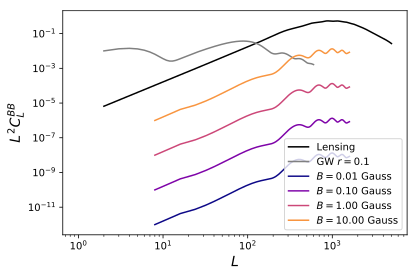

In [24]:
plt.loglog(cmbspec[:,2]*np.arange(cmbspec.shape[0])**2, 'k', label='Lensing')
plt.loglog(cmbspec_r[:,2]*np.arange(cmbspec_r.shape[0])**2, 'grey', label='GW $r=0.1$')

Bs = [0.01,0.1,1,10]
color = iter(cm.plasma(np.linspace(0,1,len(As))))

for B in Bs:
    c=next(color)
    lrot, clbrot = GimmeClBBRot(cmbspec, nwanted=200, kind='pmf', B=B, nu=150.)
    plt.loglog(lrot, lrot**2*clbrot, c=c, label='$B=%.2f$ Gauss'%B)
plt.xlabel(r'$L$', size=14)
plt.ylabel(r'$L^2 C_{L}^{BB}}$', size=14)
plt.legend(loc='lower right')
plt.tight_layout()


In [53]:
lrot, clbrotee = GimmeClBBRot(cmbspec, nwanted=200, A_CB=1, )
lrot, clbrotbb = GimmeClBBRot2(cmbspec, nwanted=200, A_CB=1, )


rotation.py:402: RuntimeWarning: divide by zero encountered in divide
  claa = np.nan_to_num(A_CB*1e-5*2*np.pi/ell/(ell+1))
rotation.py:428: RuntimeWarning: divide by zero encountered in divide
  claa = np.nan_to_num(A_CB*1e-5*2*np.pi/ell/(ell+1))


Text(0,0.5,u'$C_{\\ell}^{BB}$')

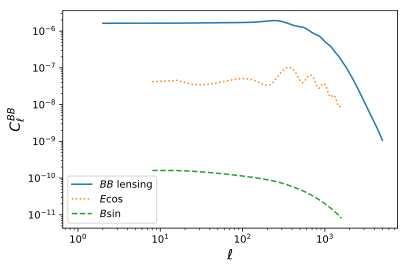

In [56]:
# plt.loglog(lrot, clbrotee+clbrotbb, )
plt.loglog(cmbspec[:,2], '-', label=r'$BB$ lensing')
plt.loglog(lrot, clbrotee, ':', label=r'$E \cos$')
plt.loglog(lrot, clbrotbb, '--', label=r'$B \sin$')
plt.legend()
plt.xlabel(r'$\ell$', size=14)
plt.ylabel(r'$C_{\ell}^{BB}$', size=14)

/Users/fbianchini/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


(1, 10000.0)

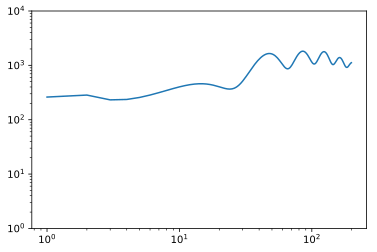

In [37]:
plt.loglog(np.nan_to_num(clbrotee/clbrotbb))
plt.ylim(1,1e4)

In [80]:
lres, clbbrotres = GimmeClBBRes(cmbspec, 0., 0.)
lres, clbbrotres_delens = GimmeClBBRes(cmbspec, 0., 0., f_delens=0.5)

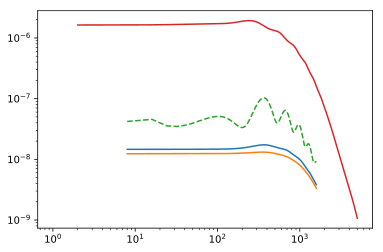

In [83]:
plt.loglog(lres, clbbrotres)
plt.loglog(lres, clbbrotres_delens)
plt.loglog(lrot, clbrot, '--')
plt.loglog(cmbspec[:,2])
# plt.loglog(cmbspec_r[:,2])

/Users/fbianchini/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/Users/fbianchini/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


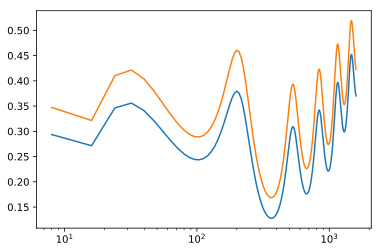

In [88]:
plt.semilogx(lrot, clbbrotres_delens/clbrot,)
plt.semilogx(lrot, clbbrotres/clbrot,)
